In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"/content/dataset_1.csv", encoding='unicode_escape')
print("Bentuk Dataset : ", data.shape)

# Menggabungkan 5 baris teratas dan 5 baris terbawah
top_rows = data.head()
middle_index = pd.Index(['...'])
bottom_rows = data.tail()

# Membuat DataFrame dengan baris kosong sebagai pemisah dengan indeks yang sesuai
separator = pd.DataFrame([['...'] * len(data.columns)], columns=data.columns, index=middle_index)

# Menggabungkan dengan mempertahankan indeks asli
combined_df = pd.concat([top_rows, separator, bottom_rows])

# Styling untuk DataFrame gabungan
styled_data = (
    combined_df
    .style.set_properties(**{
        'background-color': 'white',
        'color': 'black',
        'border': '1px solid black'
    })
    .set_table_styles([
        {'selector': 'thead th',
         'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]}
    ])
)

styled_data

Bentuk Dataset :  (30691, 11)


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.000000,Female,0.700000,0.100000,187.000000,16.000000,18.000000,6.800000,3.300000,0.900000,1
1,62.000000,Male,10.900000,5.500000,699.000000,64.000000,100.000000,7.500000,3.200000,0.740000,1
2,62.000000,Male,7.300000,4.100000,490.000000,60.000000,68.000000,7.000000,3.300000,0.890000,1
3,58.000000,Male,1.000000,0.400000,182.000000,14.000000,20.000000,6.800000,3.400000,1.000000,1
4,72.000000,Male,3.900000,2.000000,195.000000,27.000000,59.000000,7.300000,2.400000,0.400000,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.000000,Male,2.200000,1.000000,610.000000,17.000000,28.000000,7.300000,2.600000,0.550000,1
30687,55.000000,Male,2.900000,1.300000,482.000000,22.000000,34.000000,7.000000,2.400000,0.500000,1
30688,54.000000,Male,6.800000,3.000000,542.000000,116.000000,66.000000,6.400000,3.100000,0.900000,1
30689,48.000000,Female,1.900000,1.000000,231.000000,16.000000,55.000000,4.300000,1.600000,0.600000,1


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"/content/dataset_1.csv", encoding='unicode_escape')
print("Bentuk Dataset : ", data.shape)
styled_data = (
    data.head()
    .style.set_properties(**{
        'background-color': 'white',
        'color': 'black',
        'border': '1px solid black'
    })
    .set_table_styles([
        {'selector': 'thead th',
         'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]}
    ])
)

styled_data



Bentuk Dataset :  (30691, 11)


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.000000,Female,0.700000,0.100000,187.000000,16.000000,18.000000,6.800000,3.300000,0.900000,1
1,62.000000,Male,10.900000,5.500000,699.000000,64.000000,100.000000,7.500000,3.200000,0.740000,1
2,62.000000,Male,7.300000,4.100000,490.000000,60.000000,68.000000,7.000000,3.300000,0.890000,1
3,58.000000,Male,1.000000,0.400000,182.000000,14.000000,20.000000,6.800000,3.400000,1.000000,1
4,72.000000,Male,3.900000,2.000000,195.000000,27.000000,59.000000,7.300000,2.400000,0.400000,1


In [ ]:
numerical_columns = data.select_dtypes(include=['number'])

# Menghitung rentang nilai (min dan max) untuk setiap kolom numerik
ranges = numerical_columns.agg(['min', 'max']).T
ranges['range'] = ranges['max'] - ranges['min']

# Menampilkan rentang nilai
print("Rentang Nilai Masing-Masing Kolom Numerik:")
print(ranges)

Rentang Nilai Masing-Masing Kolom Numerik:
                                       min     max   range
Age of the patient                     4.0    90.0    86.0
Total Bilirubin                        0.4    75.0    74.6
Direct Bilirubin                       0.1    19.7    19.6
 Alkphos Alkaline Phosphotase         63.0  2110.0  2047.0
 Sgpt Alamine Aminotransferase        10.0  2000.0  1990.0
Sgot Aspartate Aminotransferase       10.0  4929.0  4919.0
Total Protiens                         2.7     9.6     6.9
 ALB Albumin                           0.9     5.5     4.6
A/G Ratio Albumin and Globulin Ratio   0.3     2.8     2.5
Result                                 1.0     2.0     1.0


In [ ]:
print("Nama kolom dalam dataset:")
print(data.columns)

Nama kolom dalam dataset:
Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')


In [ ]:
data.columns = data.columns.str.replace(' ', '_').str.replace('/', '_').str.strip()
data.columns = data.columns.str.strip()            # Menghapus spasi di awal/akhir
data.columns = data.columns.str.lower()            # Mengubah ke huruf kecil semua


# Hasil setelah modifikasi kolom
print(data.columns)

Index(['age_of_the_patient', 'gender_of_the_patient', 'total_bilirubin',
       'direct_bilirubin', 'alkphos_alkaline_phosphotase',
       'sgpt_alamine_aminotransferase', 'sgot_aspartate_aminotransferase',
       'total_protiens', 'alb_albumin', 'a_g_ratio_albumin_and_globulin_ratio',
       'result'],
      dtype='object')


In [ ]:
data.isnull().sum()

,0
age_of_the_patient,2
gender_of_the_patient,902
total_bilirubin,648
direct_bilirubin,561
alkphos_alkaline_phosphotase,796
sgpt_alamine_aminotransferase,538
sgot_aspartate_aminotransferase,462
total_protiens,463
alb_albumin,494
a_g_ratio_albumin_and_globulin_ratio,559


In [ ]:
print("Dataset Shape: ", data.shape)

Dataset Shape:  (30691, 11)


In [ ]:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age_of_the_patient                    30689 non-null  float64
 1   gender_of_the_patient                 29789 non-null  object 
 2   total_bilirubin                       30043 non-null  float64
 3   direct_bilirubin                      30130 non-null  float64
 4   alkphos_alkaline_phosphotase          29895 non-null  float64
 5   sgpt_alamine_aminotransferase         30153 non-null  float64
 6   sgot_aspartate_aminotransferase       30229 non-null  float64
 7   total_protiens                        30228 non-null  float64
 8   alb_albumin                           30197 non-null  float64
 9   a_g_ratio_albumin_and_globulin_ratio  30132 non-null  float64
 10  result                                30691 non-null  int64  
dtypes: float64(9), 

In [ ]:
from IPython.display import display
nan_data = data[data.isna().any(axis=1)].head(15)

styled_nan_data = nan_data.style.set_table_styles(
    [{'selector': 'tbody td', 'props': [('background-color', 'white')]}]
).set_properties(**{'color': 'black'})  # Pastikan teks hitam

display(styled_nan_data)


,age_of_the_patient,gender_of_the_patient,total_bilirubin,direct_bilirubin,alkphos_alkaline_phosphotase,sgpt_alamine_aminotransferase,sgot_aspartate_aminotransferase,total_protiens,alb_albumin,a_g_ratio_albumin_and_globulin_ratio,result
6,26.000000,Female,0.900000,0.200000,154.000000,nan,12.000000,7.000000,3.500000,1.000000,1
21,51.000000,Male,2.900000,1.300000,482.000000,22.000000,nan,7.000000,2.400000,0.500000,1
22,62.000000,Male,nan,3.000000,542.000000,116.000000,66.000000,6.400000,3.100000,0.900000,1
23,40.000000,nan,1.900000,1.000000,231.000000,16.000000,55.000000,4.300000,1.600000,0.600000,1
37,46.000000,Female,14.200000,7.800000,374.000000,nan,77.000000,4.300000,2.000000,0.800000,1
39,47.000000,nan,2.700000,1.300000,275.000000,123.000000,73.000000,6.200000,3.300000,1.100000,1
48,32.000000,Female,0.600000,0.100000,176.000000,39.000000,nan,6.000000,3.000000,1.000000,1
53,38.000000,Male,1.100000,0.300000,198.000000,86.000000,150.000000,6.300000,nan,1.200000,1
58,51.000000,Male,0.800000,nan,367.000000,42.000000,18.000000,5.200000,2.000000,0.600000,1
91,60.000000,Male,6.800000,3.200000,nan,404.000000,794.000000,6.800000,3.000000,0.700000,1


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
age_of_the_patient,0
gender_of_the_patient,0
total_bilirubin,0
direct_bilirubin,0
alkphos_alkaline_phosphotase,0
sgpt_alamine_aminotransferase,0
sgot_aspartate_aminotransferase,0
total_protiens,0
alb_albumin,0
a_g_ratio_albumin_and_globulin_ratio,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender_of_the_patient'] = le.fit_transform(data['gender_of_the_patient'])
data['result'] = le.fit_transform(data['result'])
# 0 = perempuan , 1 = laki laki
# 0 : positif , 1 : negatif

In [ ]:
data.head()

,age_of_the_patient,gender_of_the_patient,total_bilirubin,direct_bilirubin,alkphos_alkaline_phosphotase,sgpt_alamine_aminotransferase,sgot_aspartate_aminotransferase,total_protiens,alb_albumin,a_g_ratio_albumin_and_globulin_ratio,result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0


In [ ]:
data['gender_of_the_patient'].values

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
data['result'].unique()

array([0, 1])

In [ ]:
data

,age_of_the_patient,gender_of_the_patient,total_bilirubin,direct_bilirubin,alkphos_alkaline_phosphotase,sgpt_alamine_aminotransferase,sgot_aspartate_aminotransferase,total_protiens,alb_albumin,a_g_ratio_albumin_and_globulin_ratio,result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,1,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,0
30687,55.0,1,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,0
30688,54.0,1,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,0
30689,48.0,0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,0


In [ ]:
print("Dataset Shape: ", data.shape)

Dataset Shape:  (27158, 11)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
if 'Result' in data.columns:
    result_counts = data['Result'].value_counts()

    print("Total jumlah setiap nilai di kolom 'Result':")
    print(result_counts)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=result_counts.index, y=result_counts.values)

    plt.title('Jumlah Setiap Nilai di Kolom "Result"', fontsize=16)
    plt.xlabel('Nilai Result', fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)

    for i, count in enumerate(result_counts.values):
        plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

    plt.show()
else:
    print("Kolom 'Result' tidak ditemukan dalam dataset.")


Kolom 'Result' tidak ditemukan dalam dataset.


In [ ]:
data.to_csv('encoding_missing.csv', index=False)

In [ ]:
##pemisahan antara data input baru


# Fungsi untuk mengambil 50 baris data acak per label dari dataset
def split_and_export(dataset_path, output_testing_path, output_dataset_path):
    # Membaca dataset
    df = pd.read_csv(dataset_path)

    # Mengecek apakah kolom 'result' ada di dataset
    if 'result' not in df.columns:
        raise ValueError("Kolom 'result' tidak ditemukan dalam dataset.")

    # Mengelompokkan dataset berdasarkan label di kolom 'result'
    groups = df.groupby('result')

    # Menyimpan data testing dan sisanya
    testing_data = []
    remaining_data = []

    # Mengambil hingga 50 baris acak per label
    for label, group in groups:
        sampled = group.sample(n=min(50, len(group)), random_state=42)
        testing_data.append(sampled)
        remaining = group.drop(sampled.index)
        remaining_data.append(remaining)

    # Menggabungkan data testing dan sisa data
    testing_data = pd.concat(testing_data).reset_index(drop=True)
    remaining_data = pd.concat(remaining_data).reset_index(drop=True)

    # Mengekspor dataset testing
    testing_data.to_csv(output_testing_path, index=False)
    print(f"File input testing disimpan sebagai '{output_testing_path}'")

    # Mengekspor dataset yang tersisa
    remaining_data.to_csv(output_dataset_path, index=False)
    print(f"Dataset sisa disimpan sebagai '{output_dataset_path}'")

# Lokasi file input dan output
input_file = "encoding_missing.csv" # Ganti dengan nama file dataset asli Anda
output_testing_file = "input_testing.csv"
output_remaining_file = "lanjut_normal_smote.csv"

# Menjalankan fungsi
split_and_export(input_file, output_testing_file, output_remaining_file)

File input testing disimpan sebagai 'input_testing.csv'
Dataset sisa disimpan sebagai 'lanjut_normal_smote.csv'


In [ ]:
data=pd.read_csv(r"/content/lanjut_normal_smote.csv")
data.head(10)


,age_of_the_patient,gender_of_the_patient,total_bilirubin,direct_bilirubin,alkphos_alkaline_phosphotase,sgpt_alamine_aminotransferase,sgot_aspartate_aminotransferase,total_protiens,alb_albumin,a_g_ratio_albumin_and_globulin_ratio,result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0
5,46.0,1,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,0
6,29.0,0,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,0
7,55.0,1,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,0
8,57.0,1,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,0
9,72.0,1,2.7,1.3,260.0,31.0,56.0,7.4,3.0,0.60,0


In [ ]:
print("Dataset Shape: ", data.shape)

Dataset Shape:  (27058, 11)


Total jumlah setiap nilai di kolom 'Result':
result
0    19428
1     7630
Name: count, dtype: int64


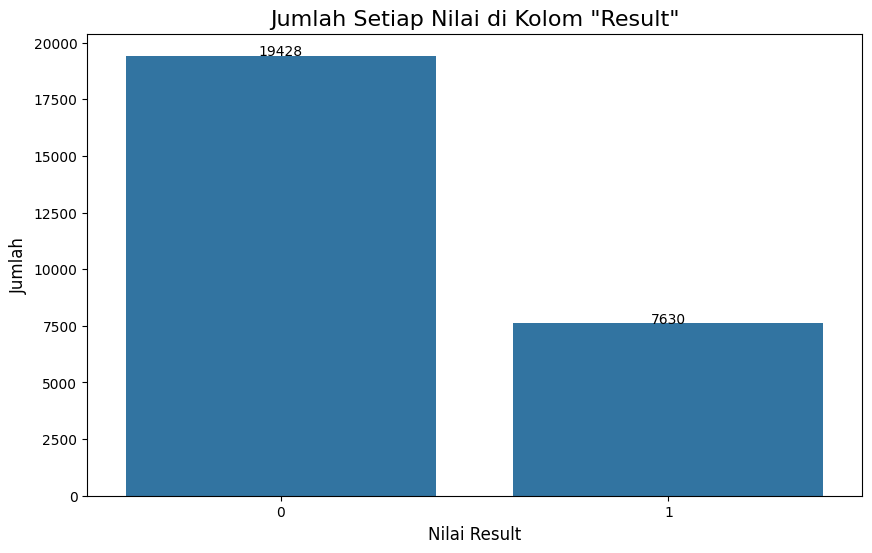

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
if 'result' in data.columns:
    result_counts = data['result'].value_counts()

    print("Total jumlah setiap nilai di kolom 'Result':")
    print(result_counts)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=result_counts.index, y=result_counts.values)

    plt.title('Jumlah Setiap Nilai di Kolom "Result"', fontsize=16)
    plt.xlabel('Nilai Result', fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)

    for i, count in enumerate(result_counts.values):
        plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

    plt.show()
else:
    print("Kolom 'Result' tidak ditemukan dalam dataset.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

X = data.drop('result', axis=1)  # Features
y = data['result']  # Target variable

# 3. Cek distribusi kelas sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(y.value_counts())

# 4. Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 5. Terapkan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# 6. Cek distribusi kelas setelah SMOTE
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_balanced).value_counts())

Distribusi kelas sebelum SMOTE:
result
0    19428
1     7630
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
result
0    19428
1    19428
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
data.isnull().sum()

,0
age_of_the_patient,0
gender_of_the_patient,0
total_bilirubin,0
direct_bilirubin,0
alkphos_alkaline_phosphotase,0
sgpt_alamine_aminotransferase,0
sgot_aspartate_aminotransferase,0
total_protiens,0
alb_albumin,0
a_g_ratio_albumin_and_globulin_ratio,0


In [ ]:
X_balanced_df = pd.DataFrame(X_balanced, columns=X.columns)

# Tambahkan kolom target
balanced_dataset = X_balanced_df.copy()
balanced_dataset['result'] = y_balanced

# Export ke CSV
balanced_dataset.to_csv('smote.csv', index=False)

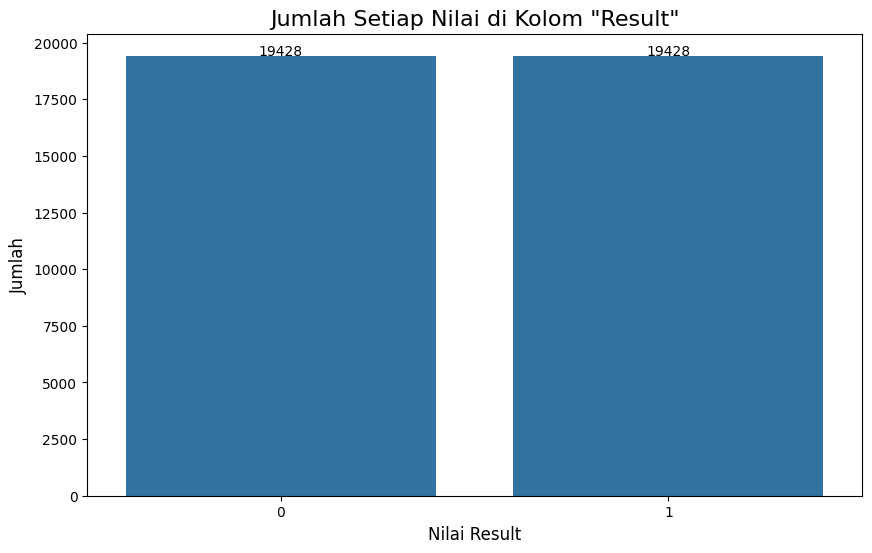

In [ ]:
data=pd.read_csv(r"/content/smote.csv")

result_counts = data['result'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=result_counts.index, y=result_counts.values)

plt.title('Jumlah Setiap Nilai di Kolom "Result"', fontsize=16)
plt.xlabel('Nilai Result', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

for i, count in enumerate(result_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)
plt.show()


In [ ]:
data.isnull().sum()

,0
age_of_the_patient,0
gender_of_the_patient,0
total_bilirubin,0
direct_bilirubin,0
alkphos_alkaline_phosphotase,0
sgpt_alamine_aminotransferase,0
sgot_aspartate_aminotransferase,0
total_protiens,0
alb_albumin,0
a_g_ratio_albumin_and_globulin_ratio,0


In [ ]:
styled_data = (
    data.head()
    .style.set_properties(**{
        'background-color': 'white',
        'color': 'black',
        'border': '1px solid black'
    })
    .set_table_styles([
        {'selector': 'thead th',
         'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]}
    ])
)

styled_data

,age_of_the_patient,gender_of_the_patient,total_bilirubin,direct_bilirubin,alkphos_alkaline_phosphotase,sgpt_alamine_aminotransferase,sgot_aspartate_aminotransferase,total_protiens,alb_albumin,a_g_ratio_albumin_and_globulin_ratio,result
0,0.709302,0.000000,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240000,0
1,0.674419,1.000000,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176000,0
2,0.674419,1.000000,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236000,0
3,0.627907,1.000000,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280000,0
4,0.790698,1.000000,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040000,0


In [ ]:
X = data.drop('result', axis=1)
y = data['result']

In [ ]:
# Export scaler setelah fit_transform
import pickle
with open('scalernew.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
!pip list | grep -E "xgboost|scikit-learn|pandas|numpy"

geopandas                          1.0.1
numpy                              1.26.4
pandas                             2.2.2
pandas-datareader                  0.10.0
pandas-gbq                         0.24.0
pandas-stubs                       2.2.2.240909
scikit-learn                       1.5.2
sklearn-pandas                     2.2.0
xgboost                            2.1.3


## dibawah ini untuk deep learning YGY


In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import (
    SMOTE,
    ADASYN,
    RandomOverSampler,
    BorderlineSMOTE,
    SVMSMOTE,
    KMeansSMOTE
)
from collections import OrderedDict

# 1. Load dataset
# Ganti 'nama_file.csv' dengan nama file Anda
df = pd.read_csv('lanjut_normal_smote.csv')

# 2. Tampilkan informasi dataset
print("=== Informasi Dataset ===")
print(df.info())
print("\nJumlah missing values:")
print(df.isnull().sum())

# 3. Pisahkan fitur (X) dan target (y)
# Sesuaikan 'target_column' dengan nama kolom target Anda
X = df.drop('result', axis=1)
y = df['result']

# 4. Tampilkan distribusi kelas awal
print("\n=== Distribusi Kelas Original ===")
print(pd.Series(y).value_counts())
print("Rasio:", pd.Series(y).value_counts(normalize=True))

# 5. Normalisasi fitur menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 6. Siapkan dictionary untuk semua teknik oversampling
oversamplers = OrderedDict({
    'Random Oversampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42),
    'KMeansSMOTE': KMeansSMOTE(random_state=42)
})

# 7. Dictionary untuk menyimpan hasil
results = {}

# 8. Aplikasikan setiap teknik oversampling
print("\n=== Menerapkan Teknik Oversampling ===")
for name, oversampler in oversamplers.items():
    print(f"\nMenerapkan {name}...")
    try:
        # Hitung waktu eksekusi
        import time
        start_time = time.time()

        # Terapkan oversampling
        X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)

        # Simpan hasil
        results[name] = {
            'X_resampled': X_resampled,
            'y_resampled': y_resampled,
            'distribution': pd.Series(y_resampled).value_counts(),
            'time': time.time() - start_time
        }

        print(f"Distribusi kelas setelah {name}:")
        print(results[name]['distribution'])
        print(f"Rasio kelas setelah {name}:")
        print(pd.Series(y_resampled).value_counts(normalize=True))
        print(f"Waktu eksekusi: {results[name]['time']:.2f} detik")
        print(f"Shape data setelah {name}: {X_resampled.shape}")

    except Exception as e:
        print(f"Error pada {name}: {str(e)}")

# 9. Fungsi untuk membuat perbandingan
def compare_results(results):
    comparison_data = []
    for name, result in results.items():
        dist = result['distribution']
        ratio = pd.Series(result['y_resampled']).value_counts(normalize=True)
        execution_time = result['time']

        comparison_data.append({
            'Technique': name,
            'Class_0_Count': dist.get(0, 0),
            'Class_1_Count': dist.get(1, 0),
            'Class_0_Ratio': ratio.get(0, 0),
            'Class_1_Ratio': ratio.get(1, 0),
            'Execution_Time': execution_time
        })

    return pd.DataFrame(comparison_data)

# 10. Tampilkan perbandingan
print("\n=== Perbandingan Semua Teknik Oversampling ===")
comparison_df = compare_results(results)
print(comparison_df)

# 11. Simpan hasil ke file
print("\n=== Menyimpan Hasil ===")
for name, result in results.items():
    # Gabungkan fitur dan target
    balanced_df = pd.concat([
        pd.DataFrame(result['X_resampled'], columns=X.columns),
        pd.Series(result['y_resampled'], name='target')
    ], axis=1)

    # Simpan ke CSV
    filename = f'balanced_data_{name.lower().replace(" ", "_")}.csv'
    balanced_df.to_csv(filename, index=False)
    print(f"Data hasil {name} disimpan ke {filename}")

# 12. Simpan perbandingan ke CSV
comparison_df.to_csv('oversampling_comparison.csv', index=False)
print("\nHasil perbandingan disimpan ke oversampling_comparison.csv")

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27058 entries, 0 to 27057
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age_of_the_patient                    27058 non-null  float64
 1   gender_of_the_patient                 27058 non-null  int64  
 2   total_bilirubin                       27058 non-null  float64
 3   direct_bilirubin                      27058 non-null  float64
 4   alkphos_alkaline_phosphotase          27058 non-null  float64
 5   sgpt_alamine_aminotransferase         27058 non-null  float64
 6   sgot_aspartate_aminotransferase       27058 non-null  float64
 7   total_protiens                        27058 non-null  float64
 8   alb_albumin                           27058 non-null  float64
 9   a_g_ratio_albumin_and_globulin_ratio  27058 non-null  float64
 10  result                                27058 non-null  in

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `

Distribusi kelas setelah SMOTE:
result
0    19428
1    19428
Name: count, dtype: int64
Rasio kelas setelah SMOTE:
result
0    0.5
1    0.5
Name: proportion, dtype: float64
Waktu eksekusi: 0.19 detik
Shape data setelah SMOTE: (38856, 10)

Menerapkan BorderlineSMOTE...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BorderlineSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Distribusi kelas setelah BorderlineSMOTE:
result
0    19428
1    19428
Name: count, dtype: int64
Rasio kelas setelah BorderlineSMOTE:
result
0    0.5
1    0.5
Name: proportion, dtype: float64
Waktu eksekusi: 0.77 detik
Shape data setelah BorderlineSMOTE: (38856, 10)

Menerapkan ADASYN...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Distribusi kelas setelah ADASYN:
result
1    20202
0    19428
Name: count, dtype: int64
Rasio kelas setelah ADASYN:
result
1    0.509765
0    0.490235
Name: proportion, dtype: float64
Waktu eksekusi: 0.69 detik
Shape data setelah ADASYN: (39630, 10)

Menerapkan SVMSMOTE...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SVMSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Distribusi kelas setelah SVMSMOTE:
result
0    19428
1    19428
Name: count, dtype: int64
Rasio kelas setelah SVMSMOTE:
result
0    0.5
1    0.5
Name: proportion, dtype: float64
Waktu eksekusi: 26.52 detik
Shape data setelah SVMSMOTE: (38856, 10)

Menerapkan KMeansSMOTE...
Error pada KMeansSMOTE: No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.

=== Perbandingan Semua Teknik Oversampling ===
             Technique  Class_0_Count  Class_1_Count  Class_0_Ratio  \
0  Random Oversampling          19428          19428       0.500000   
1                SMOTE          19428          19428       0.500000   
2      BorderlineSMOTE          19428          19428       0.500000   
3               ADASYN          19428          20202       0.490235   
4             SVMSMOTE          19428          19428       0.500000   

   Class_1_Ratio  Execution_Time  
0       0.500000        0.017754  
1       0.500000      

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The KMeansSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Data hasil Random Oversampling disimpan ke balanced_data_random_oversampling.csv
Data hasil SMOTE disimpan ke balanced_data_smote.csv
Data hasil BorderlineSMOTE disimpan ke balanced_data_borderlinesmote.csv
Data hasil ADASYN disimpan ke balanced_data_adasyn.csv
Data hasil SVMSMOTE disimpan ke balanced_data_svmsmote.csv

Hasil perbandingan disimpan ke oversampling_comparison.csv
